In [31]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

#### Import the full dataset

In [45]:
path = r'data/globalterrorismdb_0617dist.csv'
df = pd.read_csv(path, delimiter=',',encoding = "ISO-8859-1")

C:\Users\omari\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Set **indices** to the event id

In [33]:
df = df.set_index('eventid')

In [34]:
df.head(4)

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Extract summary column in a separate **Dataframe**

In [38]:
df_summary = df[['summary']]
df_summary = df_summary.fillna('No informations availabe')
df_summary.head()

,summary
eventid,
197000000001,No informations availabe
197000000002,No informations availabe
197001000001,No informations availabe
197001000002,No informations availabe
197001000003,No informations availabe


Save the summary dataframe as **CSV** file

In [43]:
df_summary.to_csv('data/gtd_summary.csv', sep=',')

Drop **summary** column from the dataset

In [46]:
df = df.drop('summary', axis=1)

#### Adapt the date

Concatenate **iyear**, **imonth** and **iday** in a new column **timestamp**, if the month or date is missing, we replace it by 01, and in order to keep track about this changes, we add a another boolean columns containing 1 if the date is full and 0 if there is some missing values.

In [50]:
def adapt_date(row):
    '''
    Concatenate iyear, imonth and iday in a new column
    param row: Dataframe row
    '''
    year = row['iyear']
    month = row['imonth']
    day = row['iday']
    if np.isnan(month):
        return str(year) + format_date(1) + format_date(1)
    elif np.isnan(day):
        return str(year) + format_date(month) + format_date(1)
    return str(year) + format_date(month)+ format_date(day)
        
        
def format_date(n):
    n  = str(n)
    if n == '0': return '-01'
    if len(n) == 1:
        return '-0'+ n
    return '-' + n

In [51]:
df['timestamp'] = df.apply(lambda row: adapt_date(row), axis=1)

In [52]:
df['date_prob'] = df.apply(lambda row: 0 if np.isnan(row['imonth']) or np.isnan(row['iday']) else 1, axis=1)

#### Pick **relevant** columns

In [ ]:
relevent_columns = ['timestamp', 'date_prob',
                    'country_txt','region_txt','city','latitude','longitude',
                    'multiple','attacktype1_txt','
                    'targtype1_txt','targsubtype1_txt','corp1','target1','natlty1',
                    'gname','weaptype1_txt','weapsubtype1_txt','nkill',
                    'nwound','property','propextent','scite1',
                    'scite2','dbsource','INT_LOG','INT_ANY','related']

In [70]:
propextend = list(df.propextent_txt.unique())
print(propextend)
propextend = ['Minor (likely < $1 million)', 'Major (likely > $1 million but < $1 billion)', 
              'Catastrophic (likely > $1 billion)']

[nan, 'Minor (likely < $1 million)', 'Major (likely > $1 million but < $1 billion)', 'Unknown', 'Catastrophic (likely > $1 billion)']


Update propextend column to the idx of the corresponding propextend value, **0** if **nan* or **Unknown**

In [72]:
df['propextent'] = df.apply(lambda row: len(propextend) if row['propextent_txt'] not in propextend else 
                            propextend.index(row['propextent_txt']), axis=1)

In [74]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,timestamp,date_prob
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,PGIS,0,1,1,1,NaN,1970-01-01,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-01-01,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-01-01,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-01-01,1


In [9]:

#df = pd.read_csv(path, delimiter=',',encoding = "ISO-8859-1")
#df2.to_csv('data/filtered_gtd.csv', sep=',')

In [10]:
df = df[relevent_columns]
df.head(4)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,property,propextent,propextent_txt,propvalue,scite1,scite2,dbsource,INT_LOG,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,0,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,0,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,0,NaN,NaN,NaN,NaN,NaN,PGIS,-9,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,1,NaN,NaN,NaN,NaN,NaN,PGIS,-9,1,NaN


In [16]:
df['date_prob'] = df.apply(lambda row: 0 if np.isnan(row['imonth']) or np.isnan(row['iday']) else 1, axis=1)

In [26]:
df['timestamp'] = df.apply(lambda row: adapt_date(row), axis=1)

In [27]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,propextent_txt,propvalue,scite1,scite2,dbsource,INT_LOG,INT_ANY,related,date_prob,timestamp
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,NaN,1,1970-07-02
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,NaN,1,1970-01-01
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,1,NaN,1,1970-01-01
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,1,NaN,1,1970-01-01
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,1,NaN,1,1970-01-01


In [5]:
relevent_columns = ['eventid','iyear','imonth','iday','approxdate','extended','resolution','country',
                    'country_txt','region','region_txt','provstate','city','latitude','longitude',
                    'multiple','success','suicide','attacktype1','attacktype1_txt','targtype1',
                    'targtype1_txt','targsubtype1','targsubtype1_txt','corp1','target1','natlty1',
                    'gname','weaptype1','weaptype1_txt','weapsubtype1','weapsubtype1_txt','nkill',
                    'nwound','property','propextent','propextent_txt','propvalue','scite1',
                    'scite2','dbsource','INT_LOG','INT_ANY','related']

In [9]:
new_df = df[relevent_columns]
new_df.to_csv('data/filtered_gtd_no_summary.csv', sep=',')

In [10]:
new_df = df[['eventid', 'summary']]
new_df.to_csv('data/filtered_gtd_summary.csv', sep=',')

In [13]:
df.memory_usage(index=True).sum()

183978080

In [24]:
x = list(df.memory_usage().index)
y = list(pd.to_numeric(df.memory_usage())*1e-6)

In [26]:
idx = np.argsort(y)

NameError: name 'np' is not defined

In [14]:
c = Counter(list(df.iyear))
x = list(c.keys())
y = list(c.values())

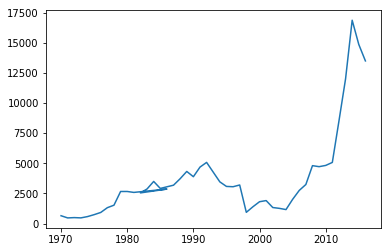

In [20]:
plt.plot(x, y)
plt.show()

In [21]:
path = r'data/readme.csv'
read = pd.read_csv(path)

In [22]:
read.head()

,symbol,date,price
0,S&P 500,Jan 2000,1394.46
1,S&P 500,Feb 2000,1366.42
2,S&P 500,Mar 2000,1498.58
3,S&P 500,Apr 2000,1452.43
4,S&P 500,May 2000,1420.60
